In [29]:
from qiskit.pulse import Schedule, MeasureChannel, DriveChannel, AcquireChannel, MemorySlot, Play, GaussianSquare, Acquire, Gaussian
from qiskit.pulse.macros import measure_all, measure
from qiskit.compiler import assemble
from qiskit.qobj.utils import MeasLevel, MeasReturnType
from qiskit.providers.aer import PulseSimulator
from qiskit.providers.aer.pulse import PulseSystemModel
from qiskit.visualization import plot_histogram
from qiskit.test.mock.backends.armonk.fake_armonk import FakeArmonk
import numpy as np

backend = FakeArmonk()

freq_est = 4.97e9
drive_est = 6.35e7
backend.defaults().qubit_freq_est = [freq_est]
backend.configuration().hamiltonian['h_str']= ['wq0*0.5*(I0-Z0)', 'omegad0*X0||D0']
backend.configuration().hamiltonian['vars'] = {'wq0': 2 * np.pi * freq_est, 'omegad0': drive_est}
backend.configuration().hamiltonian['qub'] = {'0': 2}
backend.configuration().dt = 2.2222222222222221e-10

armonk_model = PulseSystemModel.from_backend(backend)

defaults = backend.defaults()
calibrations = defaults.instruction_schedule_map
backend_sim = PulseSimulator()

def run(sched, model):
    sched_qobj = assemble(sched, backend=backend_sim)
    result = backend_sim.run(sched_qobj, system_model=model).result()
    return result.get_counts()

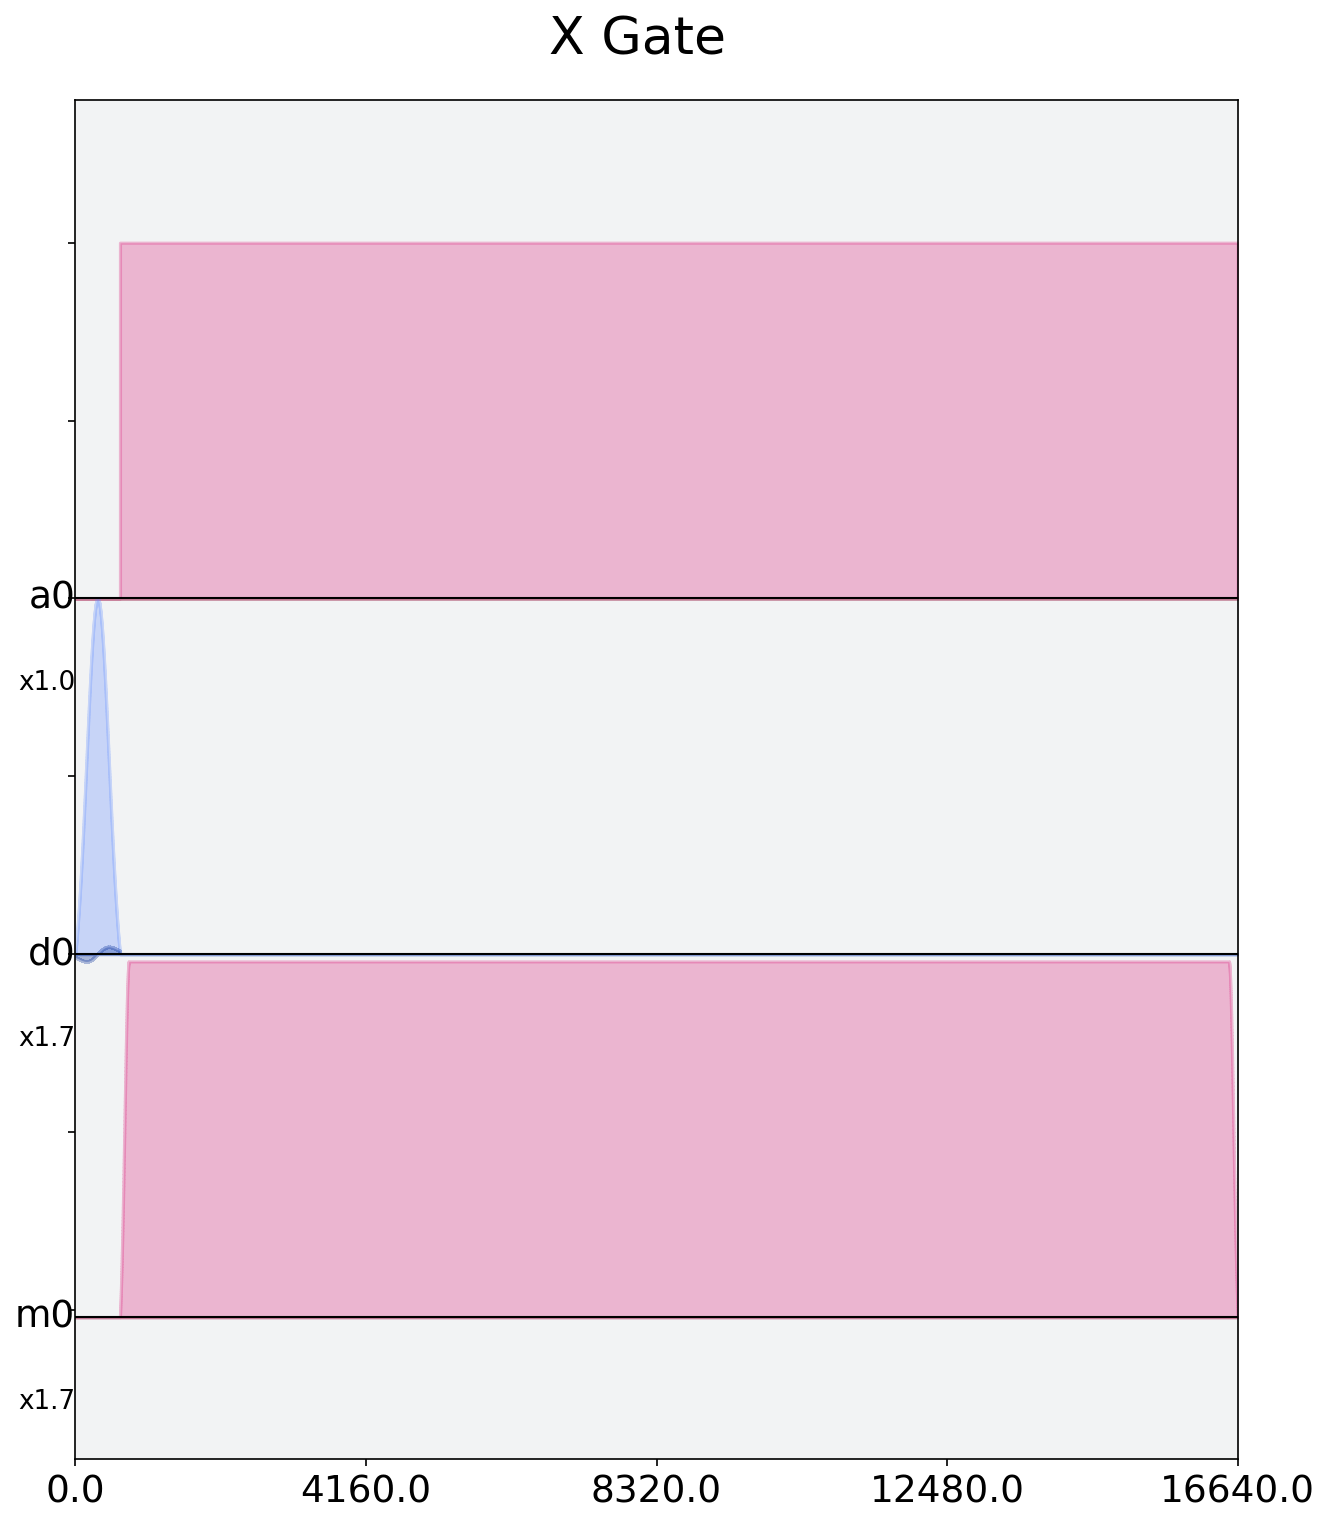

In [24]:
channel = DriveChannel(0)
sched = Schedule(name="X Gate")

x_sched = calibrations.get('x', 0)
sched |= x_sched
sched |= measure_all(backend) << sched.duration
sched.draw()

/opt/conda/lib/python3.7/site-packages/qiskit/providers/aer/pulse/controllers/pulse_controller.py:140: UserWarning: Warning: qubit_lo_freq was not specified in PulseQobj and there is no default, so it is beign automatically determined from the drift Hamiltonian.
  warn('Warning: qubit_lo_freq was not specified in PulseQobj and there is no default, '


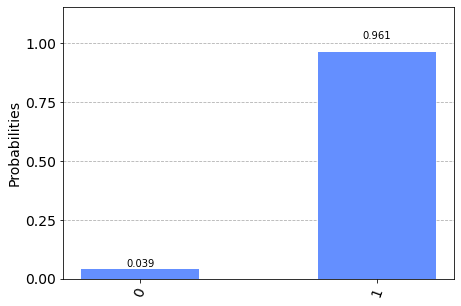

In [30]:
plot_histogram(run(sched, armonk_model))